In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

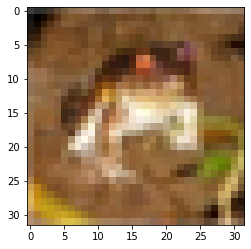

In [ ]:
digit = X_train[0]
plt.imshow(digit)
plt.show()

In [ ]:
np.set_printoptions(linewidth = 150)

print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


In [ ]:
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [ ]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255
print(X_train[4])


[0.66666667 0.70588235 0.77647059 ... 0.28627451 0.30196078 0.31372549]


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
cifar = models.Sequential()
cifar.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
cifar.add(layers.Dense(256, activation='relu'))
cifar.add(layers.Dense(10, activation='softmax'))

In [ ]:
cifar.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cifar.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%time
Hist_cifar = cifar.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.3)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
Epoch 1/100
274/274 [==============================] - 9s 29ms/step - loss: 1.9504 - accuracy: 0.3044 - val_loss: 1.7901 - val_accuracy: 0.3564
Epoch 2/100
274/274 [==============================] - 8s 28ms/step - loss: 1.7341 - accuracy: 0.3790 - val_loss: 1.7179 - val_accuracy: 0.3911
Epoch 3/100
274/274 [==============================] - 8s 28ms/step - loss: 1.6433 - accuracy: 0.4123 - val_loss: 1.6530 - val_accuracy: 0.4133
Epoch 4/100
274/274 [==============================] - 8s 28ms/step - loss: 1.5860 - accuracy: 0.4348 - val_loss: 1.7100 - val_accuracy: 0.3808
Epoch 5/100
274/274 [==============================] - 8s 28ms/step - loss: 1.5491 - accuracy: 0.4483 - val_loss: 1.6209 - val_accuracy: 0.4197
Epoch 6/100
274/274 [==============================] - 8s 29ms/step - loss: 1.5033 - accuracy: 0.4651 - val_loss: 1.5567 - val_accuracy: 0.4443
Epoch 7/100
274/274 [==============================] - 8s 28ms/step - lo

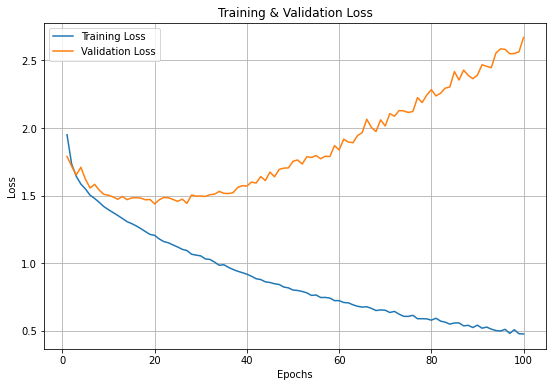

In [ ]:
epochs = range(1, len(Hist_cifar.history['loss']) + 1) # 횟수

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_cifar.history['loss'])
plt.plot(epochs, Hist_cifar.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

In [ ]:
# Loss & Accuracy
loss, accuracy = cifar.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 2.6034 - accuracy: 0.4791
Loss = 2.60343
Accuracy = 0.47910


### Accuracy가 좋지 않다....